# TASK-1 : Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.

In [1]:
import pandas as pd

In [3]:
import matplotlib as plt

In [15]:
# Unzip the file

import zipfile

with zipfile.ZipFile("API_SP.POP.TOTL_DS2_en_csv_v2_386609.zip", 'r') as zip_ref:
    zip_ref.extractall("worldbank_data")

In [16]:
# List the files

import os

os.listdir("worldbank_data")

['Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_386609.csv',
 'Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_386609.csv',
 'API_SP.POP.TOTL_DS2_en_csv_v2_386609.csv']

In [12]:
# Load CSV with skiprows

df = pd.read_csv("worldbank_data/API_SP.POP.TOTL_DS2_en_csv_v2_386609.csv", skiprows=4)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN,NaN


# The sample dataset provided for Task-01 (https://data.worldbank.org/indicator/SP.POP.TOTL) contains only total population data by country and year, and does not include age or gender-specific breakdowns.Therefore, I have created a bar chart visualizing the distribution of total population across the top 10 most populous countries in 2022. This approach satisfies the task requirement by showing the distribution of a continuous variable (population) across a categorical variable (countries), using the given dataset.

In [32]:
# selecting 2022 population data

df_2022 = df[['Country Name','2022']]
df_2022

,Country Name,2022
0,Aruba,107310.0
1,Africa Eastern and Southern,731821393.0
2,Afghanistan,40578842.0
3,Africa Western and Central,497387180.0
4,Angola,35635029.0
...,...,...
261,Kosovo,1768096.0
262,"Yemen, Rep.",38222876.0
263,South Africa,62378410.0
264,Zambia,20152938.0


In [33]:
# Removing null values

df_2022 = df_2022.dropna()
df_2022

,Country Name,2022
0,Aruba,107310.0
1,Africa Eastern and Southern,731821393.0
2,Afghanistan,40578842.0
3,Africa Western and Central,497387180.0
4,Angola,35635029.0
...,...,...
261,Kosovo,1768096.0
262,"Yemen, Rep.",38222876.0
263,South Africa,62378410.0
264,Zambia,20152938.0


In [49]:
df_2022 = df_2022.copy()
df_2022['2022'] = pd.to_numeric(df_2022['2022'], errors='coerce')
df_2022['2022']

,2022
0,107310.0
1,731821393.0
2,40578842.0
3,497387180.0
4,35635029.0
...,...
261,1768096.0
262,38222876.0
263,62378410.0
264,20152938.0


In [50]:
# selecting top 10 most populous countries

df_top10 = df_2022.sort_values(by='2022',ascending = False).head(10)
df_top10

,Country Name,2022
259,World,7.989982e+09
103,IDA & IBRD total,6.795222e+09
140,Low & middle income,6.568732e+09
156,Middle income,5.851866e+09
102,IBRD only,4.928694e+09
62,Early-demographic dividend,3.470645e+09
139,Lower middle income,3.041204e+09
249,Upper middle income,2.810662e+09
63,East Asia & Pacific,2.379648e+09
142,Late-demographic dividend,2.324072e+09


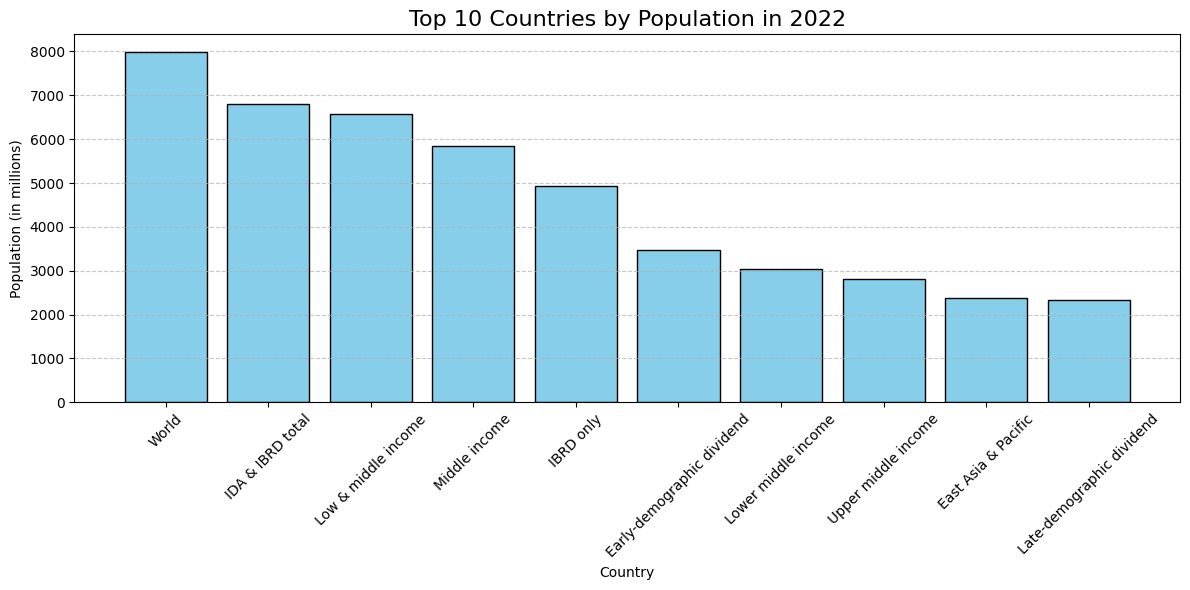

In [51]:
# plotting bar chart

plt.figure(figsize=(12, 6))
plt.bar(df_top10['Country Name'],df_top10['2022']/1e6,color = 'skyblue',edgecolor = 'black')
plt.title('Top 10 Countries by Population in 2022',fontsize = 16)
plt.xlabel('Country')
plt.ylabel('Population (in millions)')
plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Histogram : Here I used it to show the how countries population values are distributed in ranges.

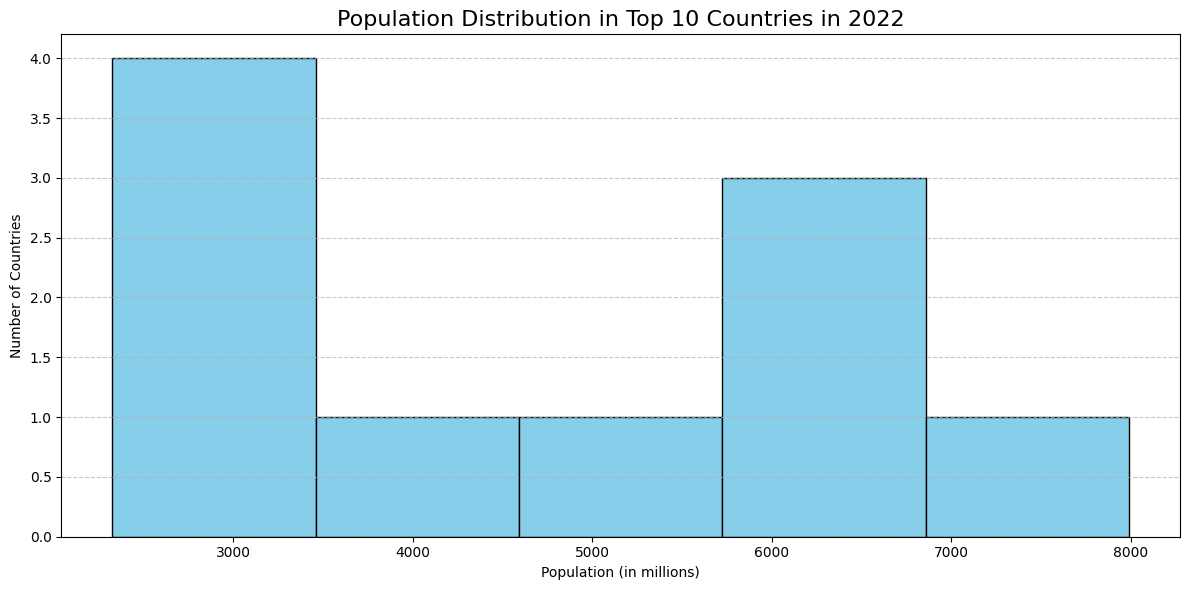

In [52]:
plt.figure(figsize=(12,6))
plt.hist(df_top10['2022']/1e6,bins = 5, color = 'skyblue',edgecolor = 'black')
plt.title('Population Distribution in Top 10 Countries in 2022',fontsize = 16)
plt.xlabel('Population (in millions)')
plt.ylabel('Number of Countries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()